<a href="https://colab.research.google.com/github/Starboy177/DataScience/blob/main/JasoHasiU9proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU8proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU8proj.ipynb"

# Unit 9 Project: Your first neural network

**Task**:

Two parts:

1. Get a data set approved by your instructor (me). It must have either: three or more variables OR a sufficiently complicated relationship between two of the variables.

2. Create, analyze, and present a multi-layer non-linear neural network using the python programming language. Remember that visualizing your model is part of analyzing it.


Guidlines:

- Your data or your model type must be different from any project you've previously done.

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a different model IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a model or likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with crazy patterns in its scatter plots. It'll be more fun that way.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import torch
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install pymc-bart
!pip install preliz
!pip install ucimlrepo
import pymc_bart as pmb
import preliz as pz
from ucimlrepo import fetch_ucirepo

Trying to predict number of bikes rented from a bike sharing system at a given time.

In [ ]:
# Load Bike Sharing dataset
bike = fetch_ucirepo(id=275)
data_X = bike.data.features
data_y = bike.data.targets

In [ ]:
predictors = ["hr", "holiday", "workingday", "mnth", "temp"]
target = data_y["cnt"]

# Prepare the dataset
X = data_X[predictors]
y = target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalize predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
class BikeNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(5, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

model = BikeNN()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    pred_train = model(X_train_tensor)
    loss = loss_function(pred_train, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        model.eval()
        with torch.no_grad():
            pred_test = model(X_test_tensor)
            test_loss = loss_function(pred_test, y_test_tensor)
        print(f"Epoch {epoch}: Train Loss = {loss.item():.2f}, Test Loss = {test_loss.item():.2f}")


Epoch 0: Train Loss = 69225.93, Test Loss = 64569.08
Epoch 50: Train Loss = 25922.75, Test Loss = 24234.37
Epoch 100: Train Loss = 23619.62, Test Loss = 22043.34
Epoch 150: Train Loss = 23429.38, Test Loss = 21936.20
Epoch 200: Train Loss = 23342.90, Test Loss = 21869.78
Epoch 250: Train Loss = 23296.73, Test Loss = 21829.24


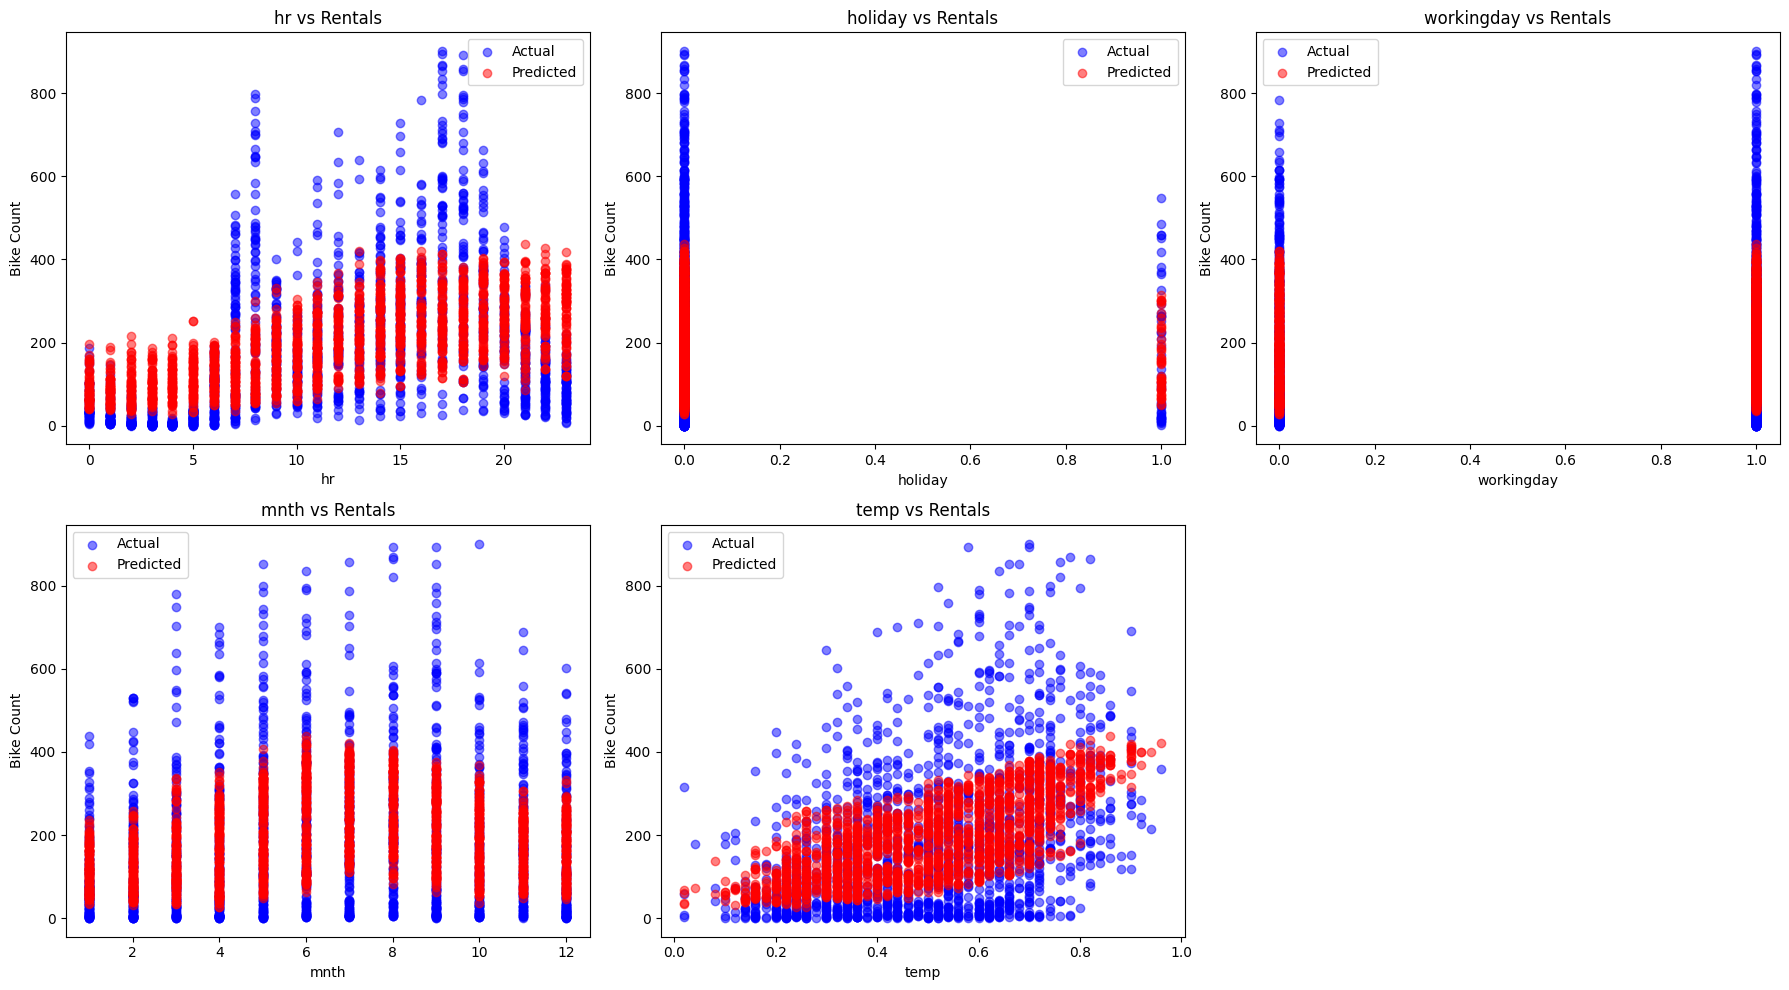

In [ ]:
# Make predictions for visualization
model.eval()
with torch.no_grad():
    y_predicted = model(X_test_tensor).numpy()

# Plot predictions vs actuals for each predictor
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i in range(len(predictors)):
    axes[i].scatter(X_test.iloc[:, i], y_test, label="Actual", alpha=0.5, color="blue")
    axes[i].scatter(X_test.iloc[:, i], y_predicted, label="Predicted", alpha=0.5, color="red")
    axes[i].set_title(f"{predictors[i]} vs Rentals")
    axes[i].set_xlabel(predictors[i])
    axes[i].set_ylabel("Bike Count")
    axes[i].legend()

axes[-1].axis('off')  # Hide last subplot if extra
plt.tight_layout()
plt.show()

Scatter plots of predictions vs. actuals showed that there was better alignment during peak hours (morning and evening commute). However there was significant variance during non-peak hours, suggesting interactions not fully captured by this model. There was also a tendency for underestimation or overestimation in extreme conditions (very cold or very hot days).